# Metodi del calcolo scientifico - **Progetto 2**

- Volpato Mattia 866316
- Andreotti Stefano 851596

## Installazione delle dipendenze

## Importazione delle librerie

In [1]:
import scipy.fftpack as fft
import numpy as np

import time
import matplotlib.pyplot as plt

## Scaling della DCT

### DCT

In [2]:
v = np.array([231, 32, 233, 161, 24, 71, 140, 245], dtype=np.uint8)
v_expected = np.array([4.01e+02, 6.60e+00, 1.09e+02, -1.12e+02, 6.54e+01, 1.21e+02, 1.16e+02, 2.88e+01])
epsilon = 1e-2

v_cos = fft.dctn(v, axes=0, type=2, norm='ortho')

assert np.allclose(v_expected, v_cos, rtol=epsilon), "DCT not corresponding"
v_cos

array([ 401.9902051 ,    6.60001991,  109.16736544, -112.78557857,
         65.40737726,  121.83139804,  116.65648855,   28.80040722])

In [3]:
v_inv = fft.idctn(v_cos, axes=0, type=2, norm='ortho').astype(np.uint8)

assert np.array_equal(v, v_inv), 'IDCT not corresponding'
v_inv

array([231,  32, 233, 161,  24,  71, 140, 245], dtype=uint8)

### DCT2

In [4]:
v = np.array([[231, 32, 233, 161, 24, 71, 140, 245],
              [247, 40, 248, 245, 124, 204, 36, 107],
              [234, 202, 245, 167, 9, 217, 239, 173],
              [193, 190, 100, 167, 43, 180, 8, 70],
              [11, 24, 210, 177, 81, 243, 8, 112],
              [97, 195, 203, 47, 125, 114, 165, 181],
              [193, 70, 174, 167, 41, 30, 127, 245],
              [87, 149, 57, 192, 65, 129, 178, 228]])

v_expected = np.array([[1.11e+03,  4.40e+01,  7.59e+01, -1.38e+02, 3.50e+00, 1.22e+02, 1.95e+02, -1.01e+02],
                       [7.71e+01,  1.14e+02, -2.18e+01, 4.13e+01, 8.77e+00, 9.90e+01, 1.38e+02, 1.09e+01],
                       [4.48e+01, -6.27e+01, 1.11e+02, -7.63e+01, 1.24e+02, 9.55e+01, -3.98e+01, 5.85e+01],
                       [-6.99e+01, -4.02e+01, -2.34e+01, -7.67e+01, 2.66e+01, -3.68e+01, 6.61e+01, 1.25e+02],
                       [-1.09e+02, -4.33e+01, -5.55e+01, 8.17e+00, 3.02e+01, -2.86e+01, 2.44e+00, -9.41e+01],
                       [-5.38e+00, 5.66e+01, 1.73e+02, -3.54e+01, 3.23e+01, 3.34e+01, -5.81e+01, 1.90e+01],
                       [7.88e+01, -6.45e+01, 1.18e+02, -1.50e+01, -1.37e+02, -3.06e+01, -1.05e+02, 3.98e+01],
                       [1.97e+01, -7.81e+01, 9.72e-01, -7.23e+01, -2.15e+01, 8.13e+01, 6.37e+01, 5.90e+00]])
epsilon = 1e-2

v_cos_x = fft.dctn(v, axes=0, type=2, norm='ortho')
v_cos = fft.dctn(v_cos_x, axes=1, type=2, norm='ortho')

assert np.allclose(v_expected, v_cos, rtol=epsilon), "DCT2 not corresponding"
v_cos

array([[ 1.11875000e+03,  4.40221926e+01,  7.59190503e+01,
        -1.38572411e+02,  3.50000000e+00,  1.22078055e+02,
         1.95043868e+02, -1.01604906e+02],
       [ 7.71900790e+01,  1.14868206e+02, -2.18014421e+01,
         4.13641351e+01,  8.77720598e+00,  9.90829620e+01,
         1.38171516e+02,  1.09092795e+01],
       [ 4.48351537e+01, -6.27524464e+01,  1.11614114e+02,
        -7.63789658e+01,  1.24422160e+02,  9.55984194e+01,
        -3.98287969e+01,  5.85237670e+01],
       [-6.99836647e+01, -4.02408945e+01, -2.34970508e+01,
        -7.67320594e+01,  2.66457750e+01, -3.68328290e+01,
         6.61891485e+01,  1.25429731e+02],
       [-1.09000000e+02, -4.33430857e+01, -5.55436908e+01,
         8.17347083e+00,  3.02500000e+01, -2.86602437e+01,
         2.44149822e+00, -9.41437025e+01],
       [-5.38783591e+00,  5.66345009e+01,  1.73021519e+02,
        -3.54234494e+01,  3.23878249e+01,  3.34576728e+01,
        -5.81167864e+01,  1.90225615e+01],
       [ 7.88439693e+01, -6.459240

In [5]:
v_inv_y = fft.idctn(v_cos, axes=1, type=2, norm='ortho')
v_inv = fft.idctn(v_inv_y, axes=0, type=2, norm='ortho').astype(np.uint8)

assert np.array_equal(v, v_inv), 'IDCT2 not corresponding'
v_inv

array([[231,  32, 233, 161,  24,  71, 140, 245],
       [247,  40, 248, 245, 124, 204,  36, 107],
       [234, 202, 245, 167,   9, 217, 239, 173],
       [193, 190, 100, 167,  43, 180,   8,  70],
       [ 11,  24, 210, 177,  81, 243,   8, 112],
       [ 97, 195, 203,  47, 125, 114, 165, 181],
       [193,  70, 174, 167,  41,  30, 127, 245],
       [ 87, 149,  57, 192,  65, 129, 178, 228]], dtype=uint8)

## Parte 1

In [6]:
def check_dct_correctenness(dct_functor:callable, v:np.array=None, v_expected:np.array=None):
  if v is None:
    v = np.array([231, 32, 233, 161, 24, 71, 140, 245], dtype=np.uint8)
    v_expected = np.array([4.01e+02, 6.60e+00, 1.09e+02, -1.12e+02, 6.54e+01, 1.21e+02, 1.16e+02, 2.88e+01])
  epsilon = 1e-2

  v_computed = dct_functor(v)

  if not np.allclose(v_expected, v_computed, rtol=epsilon):
    return False
  return True


In [7]:
def check_dct2_correctenness(dct2_functor:callable, v:np.array=None, v_expected:np.array=None):
  if v is None:
    v = np.array([[231, 32, 233, 161, 24, 71, 140, 245],
                [247, 40, 248, 245, 124, 204, 36, 107],
                [234, 202, 245, 167, 9, 217, 239, 173],
                [193, 190, 100, 167, 43, 180, 8, 70],
                [11, 24, 210, 177, 81, 243, 8, 112],
                [97, 195, 203, 47, 125, 114, 165, 181],
                [193, 70, 174, 167, 41, 30, 127, 245],
                [87, 149, 57, 192, 65, 129, 178, 228]])

    v_expected = np.array([[1.11e+03,  4.40e+01,  7.59e+01, -1.38e+02, 3.50e+00, 1.22e+02, 1.95e+02, -1.01e+02],
                          [7.71e+01,  1.14e+02, -2.18e+01, 4.13e+01, 8.77e+00, 9.90e+01, 1.38e+02, 1.09e+01],
                          [4.48e+01, -6.27e+01, 1.11e+02, -7.63e+01, 1.24e+02, 9.55e+01, -3.98e+01, 5.85e+01],
                          [-6.99e+01, -4.02e+01, -2.34e+01, -7.67e+01, 2.66e+01, -3.68e+01, 6.61e+01, 1.25e+02],
                          [-1.09e+02, -4.33e+01, -5.55e+01, 8.17e+00, 3.02e+01, -2.86e+01, 2.44e+00, -9.41e+01],
                          [-5.38e+00, 5.66e+01, 1.73e+02, -3.54e+01, 3.23e+01, 3.34e+01, -5.81e+01, 1.90e+01],
                          [7.88e+01, -6.45e+01, 1.18e+02, -1.50e+01, -1.37e+02, -3.06e+01, -1.05e+02, 3.98e+01],
                          [1.97e+01, -7.81e+01, 9.72e-01, -7.23e+01, -2.15e+01, 8.13e+01, 6.37e+01, 5.90e+00]])

  v_computed = dct2_functor(v)

  epsilon = 1e-2
  if not np.allclose(v_expected, v_computed, rtol=epsilon):
    return False
  
  v = np.random.randint(0, 256, (32, 32), dtype=np.uint8)
  v_expected = fft.dctn(v, axes=(0, 1), type=2, norm='ortho')

  v_computed = dct2_functor(v)

  epsilon = 1e-9
  if not np.allclose(v_expected, v_computed, rtol=epsilon):
    return False

  return True

### DCT

#### DCT naive

Applica la definizione utilizzando dei `for` ***loops***.

In [8]:
def dct_naive(x:np.array):
  N = len(x)
  sqrt_N, sqrt_2 = np.sqrt(N), np.sqrt(2)
  dct_x = np.zeros(N, dtype=np.float64)
  coeff = np.pi / (2 * N)

  for k in range(N):
    a_k = 0.0
    coeff_k = coeff * k
    for i, x_i in enumerate(x):
      a_k += np.cos(coeff_k * (2 * i + 1)) * x_i
    dct_x[k] = a_k / sqrt_N * sqrt_2

  dct_x[0] /= sqrt_2

  return dct_x

In [9]:
check_dct_correctenness(dct_naive)

True

#### DCT outer

Computa tutti i coefficienti utilizzando il ***prodotto esterno*** e poi sfrutta il ***prodotto riga colonna*** tra matrici.  

- `np.outer` performa il ***prodotto esterno*** di due vettori:

\begin{equation}
⊗ : (n × 1) × (m × 1) → (n × m)
\end{equation}

dove

\begin{equation}
\begin{bmatrix}
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix}
⊗
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{bmatrix}
=
\underline{v_1} ⊗ \underline{v_2} = \underline{v_1} \cdot \underline{v_2}^{T}
=
\begin{bmatrix}
a_1 \\
a_2 \\
\vdots \\
a_n
\end{bmatrix}
\cdot
\begin{bmatrix} b_1 & b_2 & ... & b_m \end{bmatrix}
=
\begin{bmatrix}
a_1 ⋅ b_1 & a_1 ⋅ b_2 & ... & a_1 ⋅ b_m \\
a_2 ⋅ b_1 & a_2 ⋅ b_2 & ... & a_2 ⋅ b_m \\
\vdots & \vdots & \ddots & \vdots \\
a_n ⋅ b_1 & a_n ⋅ b_2 & ... & a_n ⋅ b_m \\
\end{bmatrix}
\end{equation}

- `@` performa il ***prodotto riga-colonna*** tra matrici.

La **complessità spaziale** sale a $\theta(N^2)$.

In [10]:
def dct_outer(x:np.array) -> np.array:
    N = len(x)
    k_vec = np.arange(N)                                         # [0, 1, ..., N]
    n_vec = np.arange(N)                                         # [0, 1, ..., N]

    const_coeff = np.pi / (2 * N)                                # (1 x 1)
    var_coeff_vec = np.outer(k_vec, 2 * n_vec + 1)               # (N x N)
    transform_matrix = np.cos(const_coeff * var_coeff_vec)       # (N x N)

    result = transform_matrix @ x                                # (N x 1)

    result[0] *= np.sqrt(1 / N)
    result[1:] *= np.sqrt(2 / N)
    return result

In [11]:
check_dct_correctenness(dct_outer)

True

### DCT2

In [12]:
def dct2(x:np.array, dct_functor:callable) -> np.array:
    dct2_temp = np.apply_along_axis(dct_functor, axis=0, arr=x)
    dct2_x = np.apply_along_axis(dct_functor, axis=1, arr=dct2_temp)
    return dct2_x

#### DCT2 naive

Utilizza `DCT naive`

In [13]:
dct2_naive = lambda x : dct2(x, dct_naive)

check_dct2_correctenness(dct2_naive)

True

#### DCT2 outer

Utilizza `DCT outer`

In [14]:
dct2_outer = lambda x : dct2(x, dct_outer)

check_dct2_correctenness(dct2_outer)

True

#### DCT2 outer no call

Stessa idea di <code>DCT2 outer</code> ma, anzichè iterare sulle righe e sulle colonne e applicare la ***DCT***, sfrutta direttamente il **prodotto tra matrici**.

La **complessità temporale** attesa è quella del **prodotto tra matrici**, che senza ottimizazzioni corrisponde a $\theta(N^3)$.

La **complessità spaziale** è $\theta(\max(N, M)^2)$.

In [67]:
def dct2_outer_no_call(x: np.array) -> np.array:                    # (N x M)
    N, M = x.shape     
    n_vec = np.arange(N)                                            # [0, 1, ..., N]        
    m_vec = np.arange(M)                                            # [0, 1, ..., M]

    const_coeff_N = np.pi / (2 * N)                                 # (1 x 1)    
    const_coeff_M = np.pi / (2 * M)                                 # (1 x 1)

    var_coeff_N = np.outer(n_vec, 2 * n_vec + 1)                   # (N x N)
    var_coeff_M = np.outer(m_vec, 2 * m_vec + 1)                   # (M x M)

    transform_matrix = np.cos(const_coeff_N * var_coeff_N)         # (N x N)
    result = transform_matrix @ x                                   # (N x M)

    transform_matrix = np.cos(const_coeff_M * var_coeff_M)         # (M x M)
    result = result @ transform_matrix.T                            # (N x M)

    result[0, :] *= np.sqrt(1 / N)
    result[1:, :] *= np.sqrt(2 / N)
    result[:, 0] *= np.sqrt(1 / M)
    result[:, 1:] *= np.sqrt(2 / M)

    return result

In [68]:
check_dct2_correctenness(dct2_outer_no_call)

True

#### DCT2 lib

Utilizza la funzione di libreria `fft.dctn(v, axes=(0, 1) type=2, norm='ortho')`, applicandola prima per righe (`axes = 0`) e poi per colonne (`axes = 1`).

In [17]:
dct2_lib = lambda x : fft.dctn(x, axes=(0, 1), type=2, norm='ortho')

check_dct2_correctenness(dct2_lib)

True

### Benchmark

#### Calcolo dei tempi

In [18]:
def retrieve_times(function:callable, v_:list[np.array], n_trial:int=3):
  times = []

  for v in v_:
    times_v = []

    for _ in range(n_trial):
      start_time = time.time()

      function(v)

      end_time = time.time()
      times_v.append(end_time - start_time)

    times.append(np.mean(times_v))

  return times

##### Creazione delle matrici

In [19]:
N = 10
N_ = [25 * 2**n for n in range(N)]

In [20]:
MAX_VALUE = 255
MIN_VALUE = 0

v_ = [np.random.randint(MIN_VALUE, MAX_VALUE + 1, size=(n, n), dtype=np.uint8) for n in N_]

[(v.shape, v.size, np.min(v).min(), np.max(v), np.mean(v), np.median(v)) for v in v_]

[((25, 25), 625, 0, 255, 127.6, 129.0),
 ((50, 50), 2500, 0, 255, 128.8888, 131.0),
 ((100, 100), 10000, 0, 255, 127.3933, 127.0),
 ((200, 200), 40000, 0, 255, 127.897875, 128.0),
 ((400, 400), 160000, 0, 255, 127.38224375, 127.0),
 ((800, 800), 640000, 0, 255, 127.498575, 128.0),
 ((1600, 1600), 2560000, 0, 255, 127.5665546875, 128.0),
 ((3200, 3200), 10240000, 0, 255, 127.5133669921875, 127.0),
 ((6400, 6400), 40960000, 0, 255, 127.50360803222657, 127.0),
 ((12800, 12800), 163840000, 0, 255, 127.49482985229493, 127.0)]

In [21]:
OFFSET_NAIVE = 4
OFFSET_OUTER = 6
OFFSET_OUTER_NO_CALL = 9
OFFSET_CPP = 6

##### DCT2 naive

In [22]:
times_naive = retrieve_times(dct2_naive, v_[:OFFSET_NAIVE], n_trial=3)
times_naive

[0.04029242197672526,
 0.25297705332438153,
 1.9649183750152588,
 16.244378089904785]

In [23]:
coefficients = np.polyfit(N_[:OFFSET_NAIVE], times_naive, deg=3)
p_naive = np.poly1d(coefficients)

print(p_naive)

           3             2
2.175e-06 x - 3.753e-05 x + 0.001807 x - 0.01541


In [24]:
times_expected_naive = p_naive(N_[OFFSET_NAIVE:])

times_expected_naive

array([1.33899916e+02, 1.09099195e+03, 8.81545576e+03, 7.08907494e+04,
       5.68628777e+05, 4.55511041e+06])

##### DCT2 outer

In [25]:
times_outer = retrieve_times(dct2_outer, v_[:OFFSET_OUTER], n_trial=3)
times_outer

[0.0013759136199951172,
 0.009692112604777018,
 0.06456518173217773,
 0.3381667137145996,
 2.2810209592183432,
 15.673198699951172]

In [26]:
coefficients = np.polyfit(N_[:OFFSET_OUTER], times_outer, deg=3)
p_outer = np.poly1d(coefficients)

print(p_outer)

           3             2
2.469e-08 x + 5.144e-06 x - 0.000337 x + 0.01076


In [27]:
times_expected_outer = p_outer(N_[OFFSET_OUTER:])
times_expected_outer

array([  113.75901918,   860.5525078 ,  6680.09745525, 52610.77514193])

##### DCT2 outer no call

In [65]:
times_outer_no_call = retrieve_times(dct2_outer_no_call, v_[:OFFSET_OUTER_NO_CALL], n_trial=3)
times_outer_no_call

[0.0001283736261252,
 0.002944389979044596,
 0.0005745093027750651,
 0.0018496513366699219,
 0.014482657114664713,
 0.04184603691101074,
 0.23691797256469727,
 1.7182165781656902,
 10.58630625406901]

##### DCT2 Cpp

In [29]:
times_cpp = (np.array([0, 3, 27, 182, 1434, 11776]) + np.array([0, 3, 27, 183, 1420, 11379]) + np.array([1, 5, 26, 181, 1426, 11753])) / 1000 / 3
times_cpp

array([3.33333333e-04, 3.66666667e-03, 2.66666667e-02, 1.82000000e-01,
       1.42666667e+00, 1.16360000e+01])

In [30]:
coefficients = np.polyfit(N_[:OFFSET_CPP], times_cpp, deg=3)
p_cpp = np.poly1d(coefficients)

print(p_cpp)

           3             2
2.365e-08 x - 9.513e-07 x + 0.0001751 x - 0.004691


In [31]:
times_expected_cpp = p_cpp(N_[OFFSET_CPP:])
times_expected_cpp

array([   94.71583593,   765.82052119,  6162.20233326, 49446.79548942])

##### DCT2 Lib

In [57]:
times_lib = retrieve_times(dct2_lib, v_, n_trial=10)
times_lib 

[0.00013162612915039,
 0.00022814273834228515,
 0.0006666473388671,
 0.00146312154134114,
 0.0033111095428466795,
 0.008332109451293946,
 0.04112653732299805,
 0.18670074939727782,
 1.0082051515579225,
 5.000868487358093]

#### Plot

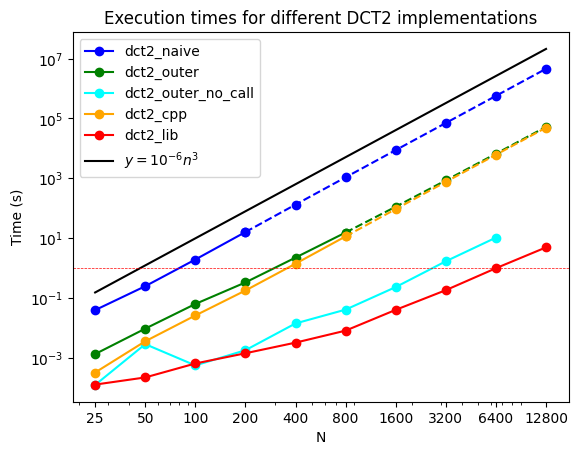

In [66]:
x_values = np.linspace(N_[0], N_[-1], 100)

plt.plot(N_[:OFFSET_NAIVE], times_naive, marker='o', linestyle='-', label='dct2_naive', color='blue')
plt.plot(N_[OFFSET_NAIVE - 1:], [times_naive[-1]] + list(times_expected_naive), marker='o', linestyle='--', color='blue')

plt.plot(N_[:OFFSET_OUTER], times_outer, marker='o', linestyle='-', label='dct2_outer', color='green')
plt.plot(N_[OFFSET_OUTER - 1:], [times_outer[-1]] + list(times_expected_outer), marker='o', linestyle='--', color='green')

plt.plot(N_[:OFFSET_OUTER_NO_CALL], times_outer_no_call, marker='o', linestyle='-', label='dct2_outer_no_call', color='cyan')

plt.plot(N_[:OFFSET_CPP], times_cpp, marker='o', linestyle='-', label='dct2_cpp', color='orange')
plt.plot(N_[OFFSET_CPP - 1:], [times_cpp[-1]] + list(times_expected_cpp), marker='o', linestyle='--', color='orange')

plt.plot(N_, times_lib, marker='o', linestyle='-', label='dct2_lib', color='red')

plt.plot(x_values, [x**3 * 10e-6 for x in x_values], marker='', linestyle='-', label='$y=10^{-6}n^3$', color='black')

plt.axhline(y=1, color='red', linestyle='--', linewidth=0.5)

plt.xscale('log')
plt.yscale('log')

plt.xticks(ticks=N_, labels=N_)

plt.xlabel('N')
plt.ylabel('Time (s)')
plt.legend()

plt.title('Execution times for different DCT2 implementations')

plt.show()

In [ ]:
import pandas as pd

implementations = ['CPP', 'OUTER', 'NAIVE']
coefficients = [p_cpp[3], p_outer[3], p_naive[3]]

df = pd.DataFrame({'Implementation': implementations, 'Cubic_coeff': coefficients})
df

## Parte 2

### Importazione delle librerie

In [ ]:
from PIL import Image

### Definizione dei parametri

- $F$ : **Dimensione** dei **macro-blocchi** in cui suddividere l'immagine;
- $d ∈ ℕ : 0 ≤ d ≤ 2F - 1 $ : **Soglia di taglio delle frequenze**.

In [ ]:
F = 32
d = 20

assert 0 <= d <= 2*F - 1, f"d must be between 0 and (2F-1)={2*F - 1}"

### Caricamento dell'immagine

In [ ]:
bmp_image_path = "..\examples\hot_guys.bmp"

# Apro l'immagine BMP
image = Image.open(bmp_image_path)

print(f"Image size: {image.size}, Image mode: {image.mode}")
image

#### Eventuale conversione in scala di grigi

In [ ]:
if not image.mode == "L":
    image = image.convert("L")

print(f"Image size: {image.size}, Image mode: {image.mode}")

image

In [ ]:
image_array = np.array(image)
x, y = image_array.shape
x, y

#### Troncamento dei pixel in eccesso

In [ ]:
x = x - x%F
y = y - y%F

image_array = image_array[: x, : y]
image_array.shape

Numero di blocchi

In [ ]:
blocks_x = x // F
blocks_y = y // F

blocks_x, blocks_y

### Suddivisione in blocchi

In [ ]:
blocks = image_array.reshape((blocks_x, F, blocks_y, F)).swapaxes(1, 2)
blocks.shape

### DTC2

In [ ]:
dct_blocks = fft.dctn(blocks, axes=(2, 3), type=2, norm='ortho')

dct_blocks.shape

### Compressione

In [ ]:
n = 0

if d <= F:
  n = (d) * (d + 1) // 2
else:
  n = int(2*F*d - 1/2*d*d - F*F - 1/2*d + F)

F, d, n

In [ ]:
dct_compressed_blocks = np.zeros((blocks_x, blocks_y, n), dtype=np.float64)

dct_compressed_blocks.shape

In [ ]:
mask = np.rot90(np.triu(np.ones((F, F), dtype=bool), k = F - d), k=1)

In [ ]:
for i, row_block in enumerate(dct_blocks):
    for j, block in enumerate(row_block):
        dct_compressed_blocks[i, j] = block[mask]

dct_compressed_blocks.shape

In [ ]:
compressed_dim = dct_compressed_blocks.shape
compressed_size = compressed_dim[0] * compressed_dim[1] * compressed_dim[2]

print(f'Originale size: {image_array.size} elements')
print(f'Compressed size: {compressed_size} elements')
print(f'Space saved: {image_array.size - compressed_size} elements ({(image_array.size - compressed_size) / image_array.size * 100} %)')
print(f'Expected space saved: {(F*F - n) * compressed_dim[0] * compressed_dim[1]} elements ({(1 - n/F/F) * 100} %)')

### Decompressione

#### Copia dei blocchi compressi in blocchi della dimensione originale

In [ ]:
decompressed_blocks = np.zeros((blocks_x, blocks_y, F, F), dtype=np.float64)
decompressed_blocks.shape

Ritorna la maschera della matrice che si vuole estrarre

In [ ]:
def triu_secondary_mask(matrix, k):
  matrix[:] = 0

  N = len(matrix)
  for i in range(min(N, k)):
    matrix[i, : min(N, k - i)] = 1

  return matrix

In [ ]:
decompressed_blocks = np.zeros((blocks_x, blocks_y, F, F), dtype=np.float64)

triu_secondary_idx = np.mask_indices(F, triu_secondary_mask, k = d)

for i, row_block in enumerate(decompressed_blocks):
    for j, block in enumerate(row_block):
        block[triu_secondary_idx[0], triu_secondary_idx[1]] = dct_compressed_blocks[i, j]

decompressed_blocks.shape

#### IDCT2

In [ ]:
for i, row_block in enumerate(decompressed_blocks):
  for j, block in enumerate(row_block):
    decompressed_blocks[i, j] = fft.idctn(block, axes=0, type=2, norm='ortho')
    decompressed_blocks[i, j] = fft.idctn(decompressed_blocks[i, j], axes=1, type=2, norm='ortho')

decompressed_blocks.shape

In [ ]:
decompressed_blocks = np.round(np.clip(decompressed_blocks, 0, 255)).astype('uint8')
decompressed_blocks.shape

### Ricostruzione dell'immagine

In [ ]:
compressed_image_array = np.zeros((x, y), np.uint8)
compressed_image_array.shape

In [ ]:
compressed_image_array = decompressed_blocks.swapaxes(1, 2).reshape((x, y))

In [ ]:
compressed_image = Image.fromarray(compressed_image_array, mode='L')
compressed_image